# I. Exploration des données

## 1. Téléchargement des données

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [51]:
df = pd.read_csv("C:\\Users\\audec\\Documents\\M2\\M2_S1\\AS\\books.csv")

In [39]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## 2. Exploration des données

### Forme de la dataframe, valeurs manquantes ou aberrantes, corrélations...

Tout d'abord, on étudie la forme de la base de données ainsi que les informations fournies par celle-ci. 

In [28]:
df.shape

(550, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [79]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [101]:
#on regarde si on a un nombre égal de livres pour chaque année : effectivement, il y a une sélection de 50 chaque année
df["Year"].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

La dataframe compte sept colonnes et 550 lignes, qui décrivent les caractéristiques(année de vente, prix, note moyenne donnée par les lecteurs...) des 50 livres les plus vendus sur Amazone par année entre 2009 et 2019.

On va ) présent vérifier que la matrice ne compte pas de valeurs manquantes

In [64]:
# Créer une nouvelle fonction qui détermine si la valeur en paramètre est manquante:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(df.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(df.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne

Valeurs manquantes par colonne:
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Valeurs manquantes par ligne:
0    0
1    0
2    0
3    0
4    0
dtype: int64


La dataframe ne compte donc aucune valeur manquante

In [24]:
df["Author"].value_counts().head(50)

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Dav Pilkey                             7
Bill O'Reilly                          7
Eric Carle                             7
Don Miguel Ruiz                        6
Harper Lee                             6
The College Board                      6
E L James                              6
Sarah Young                            6
J.K. Rowling                           6
Stieg Larsson                          6
John Grisham                           5
Dale Carnegie                          5
Roger Priddy                           5
Giles Andreae                          5
R. J. Palacio   

In [25]:
df["Author"].nunique()

248

In [16]:
df["Name"].nunique()

351

In [17]:
df["Name"].value_counts()

Publication Manual of the American Psychological Association, 6th Edition          10
StrengthsFinder 2.0                                                                 9
Oh, the Places You'll Go!                                                           8
The Very Hungry Caterpillar                                                         7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change        7
                                                                                   ..
Shred: The Revolutionary Diet: 6 Weeks 4 Inches 2 Sizes                             1
Killers of the Flower Moon: The Osage Murders and the Birth of the FBI              1
Dog Man: Lord of the Fleas: From the Creator of Captain Underpants (Dog Man #5)     1
The Ugly Truth (Diary of a Wimpy Kid, Book 5)                                       1
The Serpent's Shadow (The Kane Chronicles, Book 3)                                  1
Name: Name, Length: 351, dtype: int64

In [41]:
df.loc[df["Name"]=="The Very Hungry Caterpillar"]
# les livres qui apparaissent plusieurs fois sont en fait des best sellers plusieurs années de suite

,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction


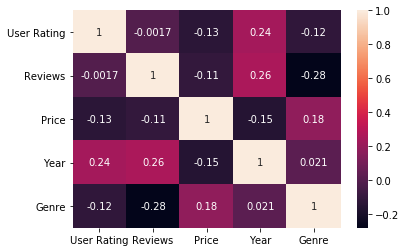

In [83]:
# matrice de corrélation

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Etude de la variable Genre**

In [27]:
df["Genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [35]:
df["Genre"].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

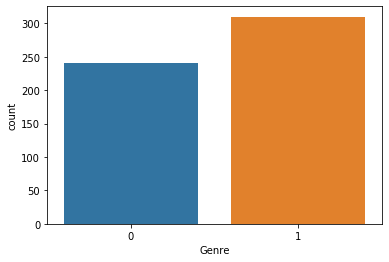

In [96]:
sns.countplot(x=df['Genre'])

TypeError: unhashable type: 'numpy.ndarray'

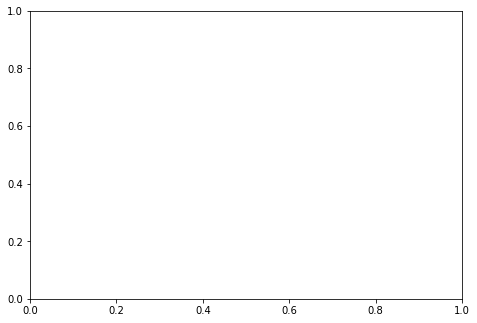

In [150]:
fig = plt.figure()
fiction=df.loc[df['Genre']=='Fiction']
non_fiction=df.loc[df['Genre']=='Non Fiction']
ind=df['Year']
width= 0.4

ax = fig.add_axes([0,0, 1, 1])
p1= plt.bar(ind, non_fiction, width)
p2= plt.bar(ind, fiction, width, bottom=non_fiction)


plt.show()

In [154]:

df['Genre'].plot.bar(stacked=True)

TypeError: no numeric data to plot

*Création d'un graphique permettant de voir la répartition des deux modalités de Genre, fiction et non-fiction, entre les 
années *

In [93]:
#1. On crée tout d'abord une nouvelle dataframe qui somme pour chaque année le nombre de livres de fiction et de non fiction

nf=df.groupby(['Year','Genre']).agg('count')

nf

Name  Author  User Rating  Reviews  Price
Year Genre                                           
2009 0        24      24           24       24     24
     1        26      26           26       26     26
2010 0        20      20           20       20     20
     1        30      30           30       30     30
2011 0        21      21           21       21     21
     1        29      29           29       29     29
2012 0        21      21           21       21     21
     1        29      29           29       29     29
2013 0        24      24           24       24     24
     1        26      26           26       26     26
2014 0        29      29           29       29     29
     1        21      21           21       21     21
2015 0        17      17           17       17     17
     1        33      33           33       33     33
2016 0        19      19           19       19     19
     1        31      31           31       31     31
2017 0        24      24           24       24     24
     1        26      26           26       26     26
2018 0        21      21           21       21     21
     1        29      29           29       29     29
2019 0        20      20           20       20     20
     1        30      30           30       30     30

In [24]:
genre=df['Genre']
non_fiction=0
fiction=0

for i in range(len(genre))
    if df['Genre']=='Non Fiction':
        non_fiction=non_fiction +1
    else:
        fiction=fiction+1
        
non_fiction

SyntaxError: invalid syntax (<ipython-input-24-042455306d1e>, line 5)

In [22]:
df["Genre"].value_counts().groupby('Year')

KeyError: 'Year'

In [19]:
df_year= pd.DataFrame({'Non Fiction sum by Year':nf, 'Fiction sum by Year':fi})
df_year

ValueError: If using all scalar values, you must pass an index

In [52]:
df["Genre"] = df.Genre.replace(to_replace=['Fiction', 'Non Fiction'], value=[0, 1])

### Etude des autres variables en fonction des années

In [ ]:
# il serait intéressant de réaliser du traitement de textes afin d'affiner l'analyse

In [36]:
# on affiche un histogramme des notes données aux livres afin de mieux en étudier la répartition (le 3,3 était-il
# une valeur aberrante ou il y a-t-il plusieurs best sellers avec de "mauvaises notes")

In [46]:
rate=df["User Rating"]

(array([  1.,   1.,   0.,   5.,  14.,  14.,  63.,  60., 213., 179.]),
 array([3.3 , 3.46, 3.62, 3.78, 3.94, 4.1 , 4.26, 4.42, 4.58, 4.74, 4.9 ]),
 <a list of 10 Patch objects>)

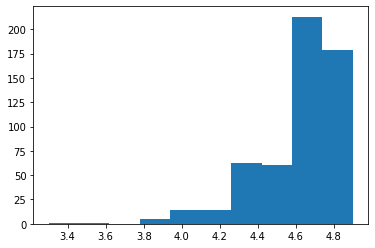

In [47]:
plt.figure()
plt.hist(rate,10)

In [48]:
# ne suit pas une distribution normale + la quasi totalité des livres ont une note supérieure à 4/5

In [49]:
# on affiche un histogramme du nombre de reviews afin de mieux en étudier la répartition

(array([17., 31., 29., 40., 28., 40., 30., 23., 29., 20., 31., 21., 20.,
         9.,  5., 16.,  7.,  5.,  5., 12.,  4.,  4., 18.,  1., 15., 11.,
        14.,  3.,  5., 12.,  8.,  1.,  2.,  7.,  2.,  0.,  3.,  0.,  2.,
         0.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  2.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.700000e+01, 9.150400e+02, 1.793080e+03, 2.671120e+03,
        3.549160e+03, 4.427200e+03, 5.305240e+03, 6.183280e+03,
        7.061320e+03, 7.939360e+03, 8.817400e+03, 9.695440e+03,
        1.057348e+04, 1.145152e+04, 1.232956e+04, 1.320760e+04,
        1.408564e+04, 1.496368e+04, 1.584172e+04, 1.671976e+04,
        1.759780e+04, 1.847584e+04, 1.935388e+04, 2.023192e+04,
        2.110996e+04, 2.198800e+04, 2.286604e+04, 

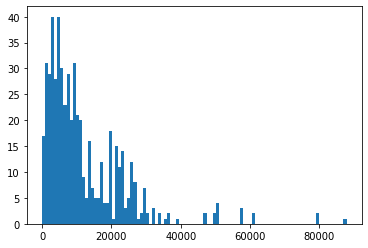

In [54]:
reviews=df["Reviews"]
plt.figure()
plt.hist(reviews, 100)

In [60]:
# de même, pas de distribution normale ! on voit que la plupart des romans ont entre 0 et 20 000 reviews.

(array([13.,  5.,  1., 32., 36., 38., 23., 52., 38., 28., 35., 27., 29.,
        30., 21., 20., 19., 14.,  4., 17., 15.,  5.,  5.,  2.,  0.,  4.,
         6.,  0.,  5.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  5.,
         0.,  1.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.  ,   1.05,   2.1 ,   3.15,   4.2 ,   5.25,   6.3 ,   7.35,
          8.4 ,   9.45,  10.5 ,  11.55,  12.6 ,  13.65,  14.7 ,  15.75,
         16.8 ,  17.85,  18.9 ,  19.95,  21.  ,  22.05,  23.1 ,  24.15,
         25.2 ,  26.25,  27.3 ,  28.35,  29.4 ,  30.45,  31.5 ,  32.55,
         33.6 ,  34.65,  35.7 ,  36.75,  37.8 ,  38.85,  39.9 ,  40.95,
         42.  ,  43.05,  44.1 ,  45.15,  46.2 ,  47.25,  48.3 ,  49.35,
  

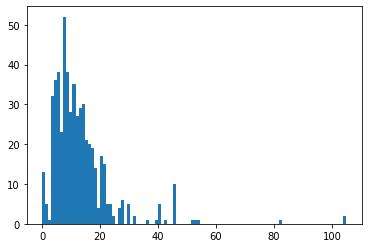

In [62]:
price=df["Price"]
plt.figure()
plt.hist(price, 100)

In [63]:
df.loc[df['Price']>80]

# Grâce à cette ligne, on affiche les livres dont le prix semblait "aberrant" au niveau de la distribution
# Or, ces prix semblent cohérents avec le contenu (par exemple, la ligne 473 qui est en fait une collection de plusieurs
# livres)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002032C41BE80>,
      dtype=object)

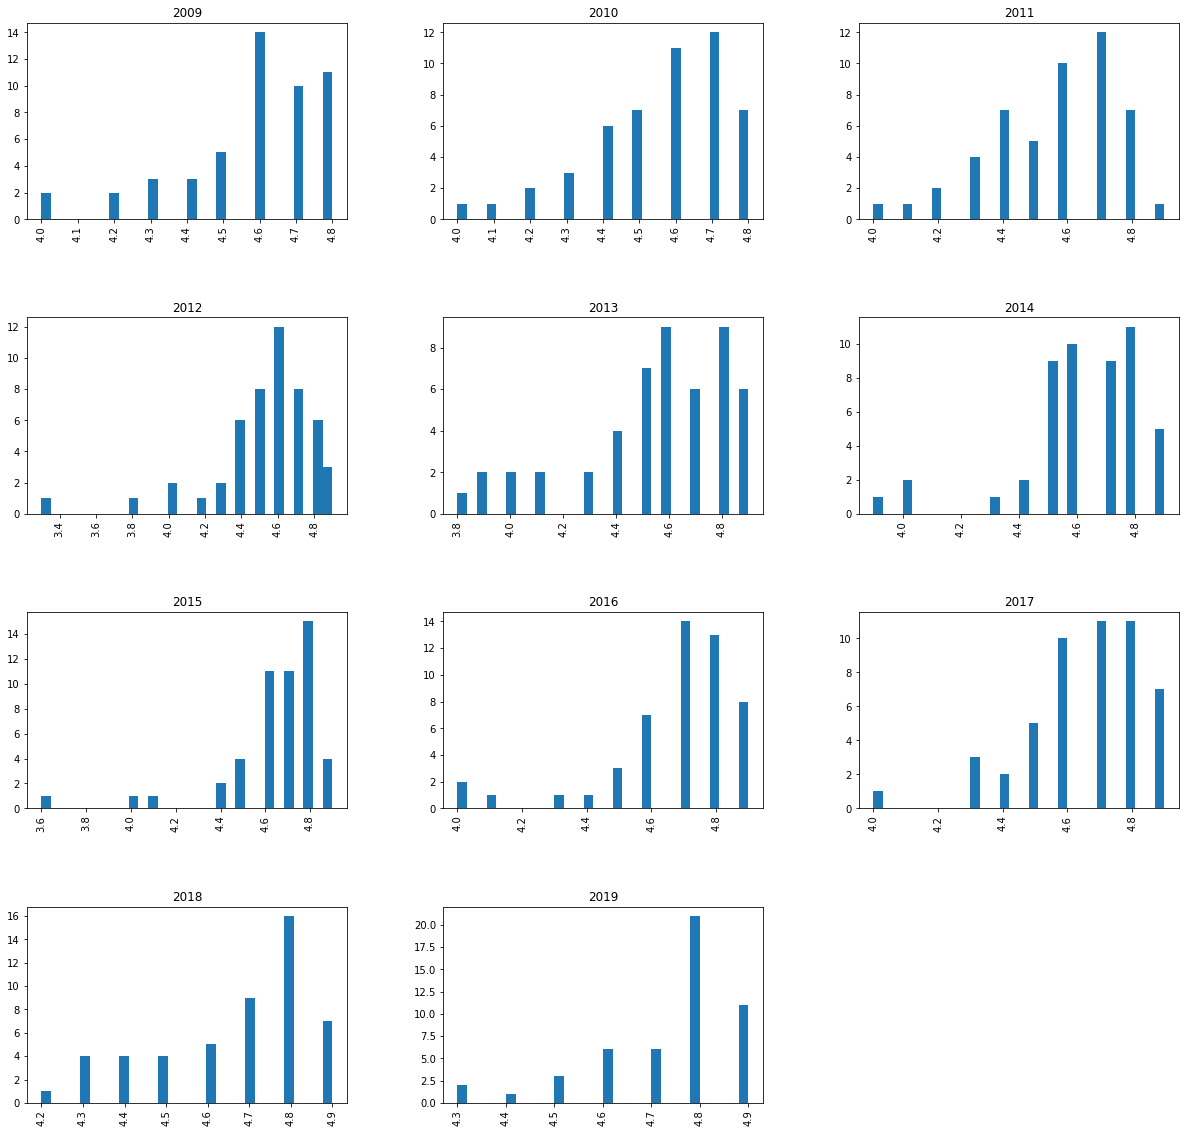

In [127]:
# les seules variables ayant l'air corrélées sont l'année et la note, l'année et le nombre de reviews, étudions cela de plus
# près

df.hist(column="User Rating",by="Year",bins=30, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002032CB3CBA8>,
      dtype=object)

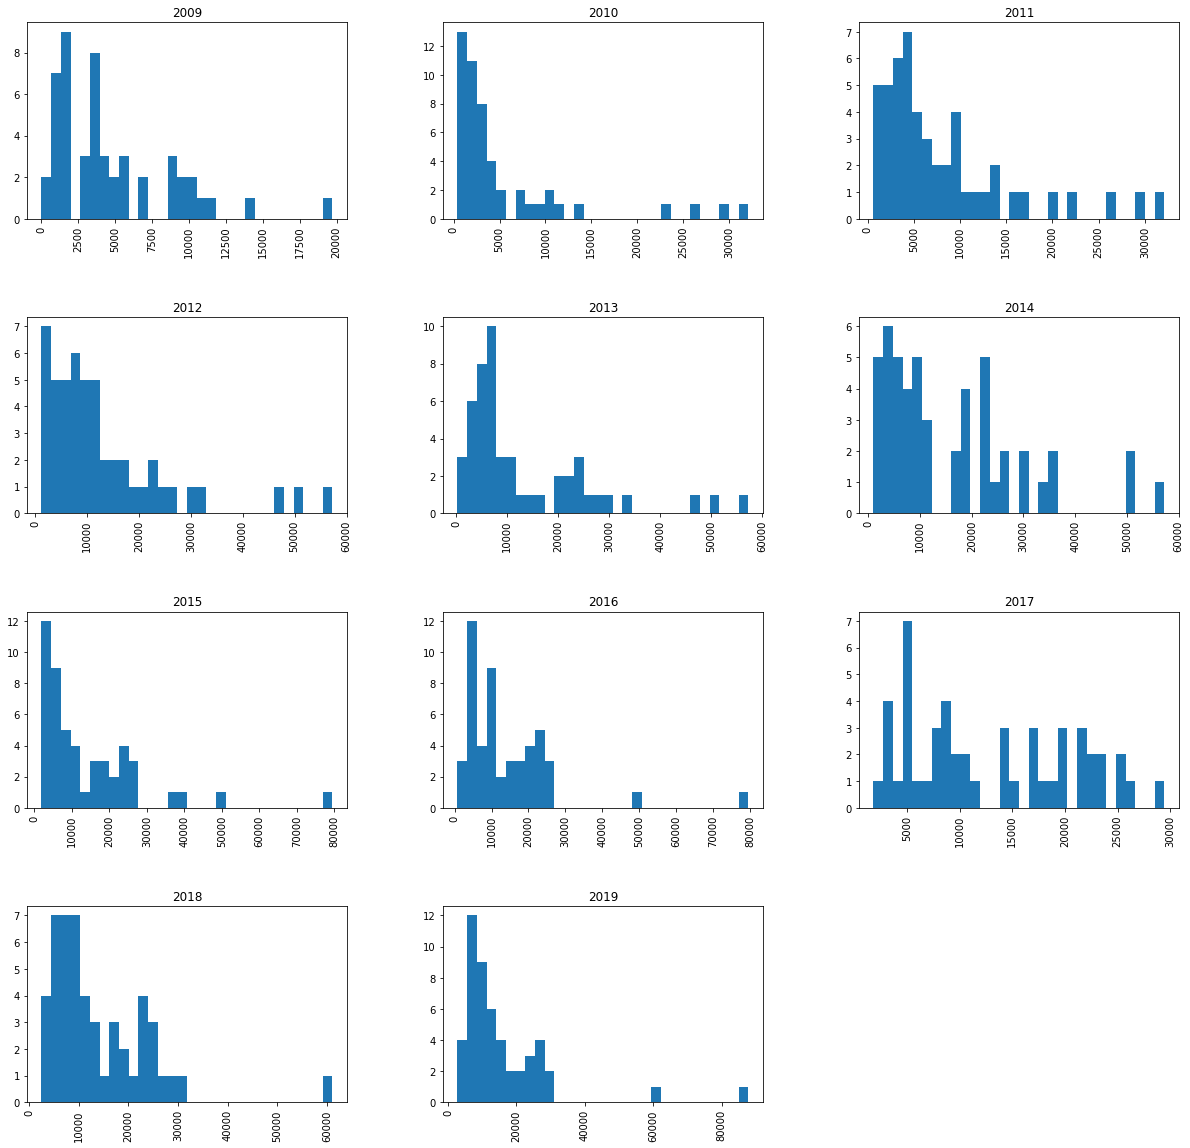

In [128]:
df.hist(column="Reviews",by="Year",bins=30, figsize=(20,20))

In [102]:
median_ratings=df['User Rating'].groupby(df['Year']).median()
mean_ratings=df['User Rating'].groupby(df['Year']).mean()
median_reviews=df['Reviews'].groupby(df['Year']).median()
mean_reviews=df['Reviews'].groupby(df['Year']).mean()
median_prices=df['Price'].groupby(df['Year']).median()
mean_prices=df['Price'].groupby(df['Year']).mean()

In [104]:
stats= pd.DataFrame({'Median Ratings':median_ratings, 'Mean Ratings':mean_ratings, 'Median Reviews':median_reviews, 
                     'Mean Reviews':mean_reviews, 'Median Prices':median_prices, 'Mean Prices':mean_prices})
stats

,Median Ratings,Mean Ratings,Median Reviews,Mean Reviews,Median Prices,Mean Prices
Year,,,,,,
2009,4.60,4.584,3780.0,4710.12,12.0,15.40
2010,4.60,4.558,2638.5,5479.62,12.5,13.48
2011,4.60,4.558,5184.0,8100.82,13.0,15.10
2012,4.60,4.532,9333.5,13090.92,13.0,15.30
2013,4.60,4.554,7094.0,13098.14,12.5,14.60
2014,4.65,4.622,10514.0,15859.94,10.0,14.64
2015,4.70,4.648,9144.0,14233.38,9.0,10.42
2016,4.70,4.678,10545.0,14196.00,9.0,13.18
2017,4.70,4.660,10560.5,12888.40,9.0,11.38


Nous avons choisi de faire apparaître les médianes puisque cela permet de lisser les valeurs extrêmes (nous avons pu observer en étudiant la distribution des variables concernées que celles-ci présentaient des points extrêmes notamment au niveau du prix ou du nombre de reviews). La seule variable ne présentant pas de valeurs extrêmes, Ratings, affiche ainsi une médiane et une moyenne très proches.
La médiane permet de mieux refléter l'évolution réelle au cours des années, c'est pourquoi c'est cette valeur que nous avons décidé de faire apparaître dans nos graphiques.

A COMPLETER

<function matplotlib.pyplot.show(*args, **kw)>

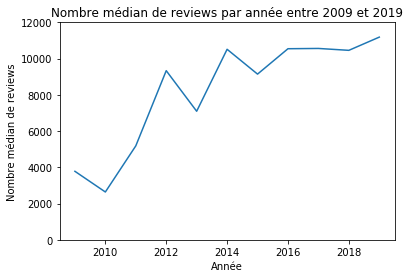

In [123]:
# On affiche les graphiques pour voir l'évolution
x=stats.index
y=stats['Median Reviews']

plt.plot(x,y)
plt.ylim(0, 12000)
plt.title('Nombre médian de reviews par année entre 2009 et 2019')
plt.xlabel('Année')
plt.ylabel('Nombre médian de reviews')
plt.show

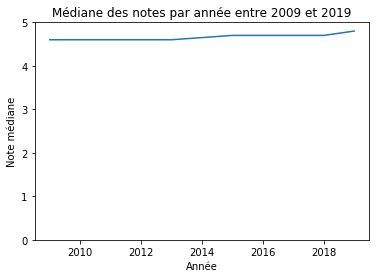

In [124]:
x=stats.index
y=stats['Median Ratings']

plt.plot(x,y)
plt.ylim(0,5)
plt.title('Médiane des notes par année entre 2009 et 2019')
plt.xlabel('Année')
plt.ylabel('Note médiane')
plt.show()

# Ici, on décèle malgré la stabilité des valeurs une faible tendance positive, c'est pourquoi on réalise un deuxième
# graphique plus précis qui permet de mieux étudier l'évolution des valeurs

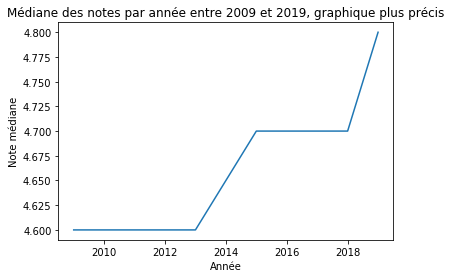

In [125]:
x=stats.index
y=stats['Median Ratings']

plt.plot(x,y)
plt.title('Médiane des notes par année entre 2009 et 2019, graphique plus précis')
plt.xlabel('Année')
plt.ylabel('Note médiane')
plt.show()

# Ce graphique permet de mieux observer l'évolution à la hausse (tendance positive) des notes médianes par année

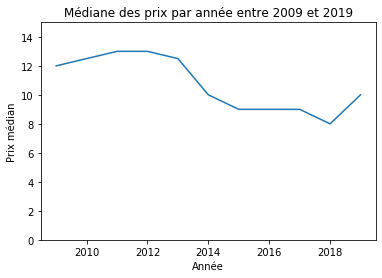

In [126]:
x=stats.index
y=stats['Median Prices']

plt.plot(x,y)
plt.ylabel('Prix médian')
plt.xlabel('Année')
plt.title('Médiane des prix par année entre 2009 et 2019')
plt.ylim(0,15)
plt.show()

## 3. Prédiction du genre

### 1. Méthode paramétrique : la régression logistique

**Split des données**

In [53]:
#1 er split du jeu de données : split pour les méthodes paramétriques, nous réalisons donc un split de 50/50

X, y = df.iloc[:,2:5], df.iloc[:,6]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

print(X.shape, y.shape, X_train.shape, X_test.shape)

(550, 3) (550,) (275, 3) (275, 3)


**Normalisation des données**

In [64]:
# On normalise ensuite les données

my_scaler=StandardScaler()
X_train_norm= my_scaler.fit_transform(X_train)
X_test_norm = my_scaler.transform(X_test)

**Test des modèles de régression logistique : données normalisées ou non, option 'balanced'...**

In [90]:
# Régression logistique

reg_log=linear_model.LogisticRegression(C=99000, solver='lbfgs')

# C : inverse de la force de la contrainte; si C est faible, alors la contrainte l'est également

reg_log.fit(X_train_norm,y_train)
y_pred_logreg_norm= reg_log.predict(X_test_norm)

accuracy_test_norm=accuracy_score(y_test, y_pred_logreg_norm, normalize=True, sample_weight=None)
print(accuracy_test_norm)

0.6763636363636364


In [89]:
reg_log.fit(X_train,y_train)
y_pred_logreg= reg_log.predict(X_test)

accuracy_test=accuracy_score(y_test, y_pred_logreg, normalize=True, sample_weight=None)
print(accuracy_test)

0.6727272727272727


In [60]:
# on essaie en ajoutant un classweight 'balanced' afin d'équilibrer la différence de pondération entre les classes fiction
# et non-fiction

reg_log_balanced=linear_model.LogisticRegression(C=1e8, class_weight='balanced', solver='lbfgs')
reg_log_balanced.fit(X_train,y_train)
y_pred_logreg_balanced= reg_log_balanced.predict(X_test)

accuracy_test_balanced=accuracy_score(y_test, y_pred_logreg_balanced, normalize=True, sample_weight=None)
print(accuracy_test_balanced)


# On a donc un moins bon résultat lorsqu'on utilise les balanced; on n'utilisera donc pas cette option

0.6581818181818182


**Détermination du meilleur niveau de contrainte et du meilleur 'solver'**

In [ ]:
# mise en place d'une boucle permettant de choisir le modèle de régression logistique permettant de fournir la meilleure
# accuracy

# on n'utilisera pas sag et saga car ce sont des bases plus efficaces sur grand dataset, or notre base de données ne 
#compte que 550 observations

# lbfgs est le solver par défaut tandis que liblinear fonctionne très bien sur petits dataset, ce qui semble être bien
# adapté à notre base de données

my_solver=['lbfgs', 'liblinear']
my_penalty=['l2','l1']
c=np.arange(0.001, 10000, 0.01)

# on crée une liste vide qui contient n (nombre de modèles testés) vecteurs de p lignes (nombre de résultats, c'est-à-dire
# nombre de C testés)
list_results=[]

for i in range(len(my_penalty)):
    
    parameters={'C':c}

    reg_log=linear_model.LogisticRegression(solver=my_solver[i], penalty=my_penalty[i])
    clf=GridSearchCV(reg_log, parameters)

    clf.fit(X_train_norm, y_train)

    results=clf.cv_results_
    # score: accuracy de validation du modèle testé
    results2=results['mean_test_score']
    
    list_results.append(results2)

In [185]:
list_results[0].shape

(9999,)

In [ ]:
plt.figure()
for i in range(len(my_penalty)):
    plt.semilogx(c, list_results[i])
    plt.legend(my_penalty)


In [135]:
np.where(list_results[1]==list_results[1].max())

(array([ 82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96, 132, 133, 134, 135], dtype=int64),)

In [138]:
list_results[1].max()

0.610909090909091

In [136]:
c[82]

0.083

Entre la pénalité l1 et l2, on observe que c'est la pénalité l1 qui permet d'atteindre le plus haut niveau d'accuracy, pour un c=0.083. On choisit le c le plus petit (A COMPLETER)

In [137]:
parameters={'C':c, 'l1_ratio':np.arange(0,1.1,0.1)}

reg_log=linear_model.LogisticRegression(solver='saga', penalty='elasticnet')
clf=GridSearchCV(reg_log, parameters)

clf.fit(X_train_norm, y_train)

results=clf.cv_results_
# score: accuracy de validation du modèle testé
results2=results['mean_test_score']


In [141]:
results2.shape

(109989,)

In [144]:
# il faut donc reconditionner results2 pour afficher autant de lignes que de valeurs de c testées et autant de colonnes
# que de valeurs de ratio testées

results2=np.reshape(results2, (9999, 11))
results2

array([[0.54181818, 0.54181818, 0.54181818, ..., 0.54181818, 0.54181818,
        0.53090909],
       [0.55636364, 0.54181818, 0.54181818, ..., 0.54181818, 0.54181818,
        0.54181818],
       [0.56727273, 0.54181818, 0.52363636, ..., 0.54181818, 0.54181818,
        0.54181818],
       ...,
       [0.58909091, 0.58909091, 0.58909091, ..., 0.58909091, 0.58909091,
        0.58909091],
       [0.58909091, 0.58909091, 0.58909091, ..., 0.58909091, 0.58909091,
        0.58909091],
       [0.58909091, 0.58909091, 0.58909091, ..., 0.58909091, 0.58909091,
        0.58909091]])

In [146]:
# on cherche dans quelle colonne (c'est-à dire pour quelle valeur du ratio) et quelle ligne (valeur de c) le maximum 
# d'accuracy se trouve

np.max(results2)

0.5999999999999999

In [147]:
np.where(results2==results2.max())

(array([29], dtype=int64), array([4], dtype=int64))

On en déduit donc que le modèle de régression linéaire produisant la meilleure accuracy est le modèle de solver 'liblinear', avec la pénalité 'l1' et un c de valeur 0.083 (ce qui n'est pas surprenant car ce solver était explicité dans la notice python comme étant idéal pour les petits datasets, or le notre ne compte que 550 observations).
De plus, liblinear particulièrement adapté pour les classifs binaires

### Naive Bayes Classifier : Gaussian NB et Bernoulli NB

In [177]:
# Gaussian NB
my_var=np.arange(1,100,0.1)
parameters={'var_smoothing':my_var}

nb_gauss=GaussianNB()

clf_gauss=GridSearchCV(nb_gauss, parameters)
clf_gauss.fit(X_train_norm, y_train)

results_gauss=clf_gauss.cv_results_
# score: accuracy de validation du modèle testé
results2_gauss=results_gauss['mean_test_score']

In [178]:
# Bernoulli NB
my_alpha=np.arange(1,100,0.1)
parameters={'alpha':my_alpha}

nb_bernoulli=BernoulliNB()

clf_bernoulli=GridSearchCV(nb_bernoulli, parameters)
clf_bernoulli.fit(X_train_norm, y_train)

results_bernoulli=clf_bernoulli.cv_results_
# score: accuracy de validation du modèle testé
results2_bernoulli=results_bernoulli['mean_test_score']

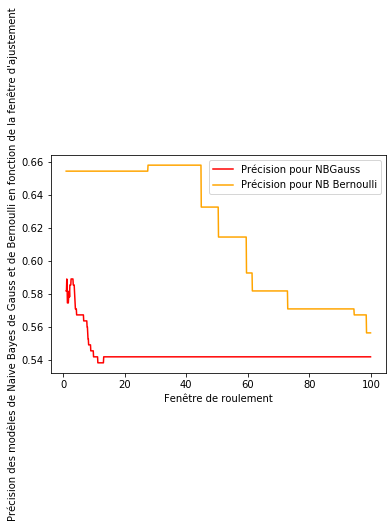

In [181]:
# Maintenant, on réalise un graphique avec les résultats de précision des naive bayes de Gauss et de Bernoulli, afin
# d'évaluer quel modèle donne la meilleure accuracy
vecteur_plot=np.arange(1,100, 0.1)

plt.figure()
plt.plot(vecteur_plot,results2_gauss,"r")
plt.plot(vecteur_plot,results2_bernoulli,"orange")

plt.legend(["Précision pour NBGauss", "Précision pour NB Bernoulli"])
plt.xlabel("Fenêtre de roulement") # NOM A CHANGER
plt.ylabel("Précision des modèles de Naive Bayes de Gauss et de Bernoulli en fonction de la fenêtre d'ajustement")
plt.show()

In [182]:
np.where(results2_bernoulli==results2_bernoulli.max())

(array([266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
        279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
        292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
        305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
        318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
        331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
        344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
        357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
        370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
        383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
        396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
        422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
        435, 436, 437, 438], dtype=int64),)

In [183]:
results2_bernoulli[266]

0.6581818181818182

**Confusion Matrix du modèle de régression logistique**

### 2. Méthodes non-paramétriques : Random Forest Classifier, KNN, SVM

**Split du jeu de données**

In [151]:
#1 er split du jeu de données : split pour les méthodes non-paramétriques, nous réalisons donc un split de 70/30 (on ne fait)
# pas 80/20 ou plus car il y a peu d'observations et il n'y aurait pas assez de données pour le test

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.3, random_state=5)

**Normalisation des données**

In [152]:
my_scaler=StandardScaler()
X_train_norm_np= my_scaler.fit_transform(X_train_np)
X_test_norm_np = my_scaler.transform(X_test_np)

#### A. Random Forest Classifier

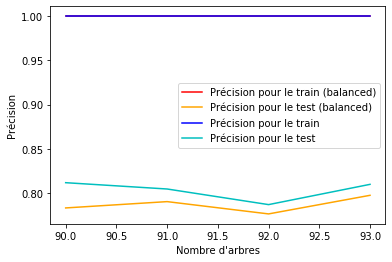

In [88]:

# on calcule l'accuracy de la partie train et test pour un nombre d'arbres i appartenant à [90,120] et on affiche
# ces valeurs dans un graphique afin de déterminer quel nombre 
# d'arbres maximise l'accuracy. Nous avons choisi cette valeur d'intervalle pour le nombre d'arbres car le nombre d'arbres par 
#défaut est 100, nous pensons donc que l'intervalle [90,120] est pertinente pour trouver le nombre optimal d'arbres.
acc_train_vector_ba=np.zeros((4,))
acc_test_vector_ba=np.zeros((4,))
acc_train_vector_rf=np.zeros((4,))
acc_test_vector_rf=np.zeros((4,))

vecteur_test=np.arange(90,94)

# on crée ensuite la boucle qui permettra de calculer l'accuracy de la partie train et test pour chacune des 25
#valeurs du nombre de voisins :

for my_nb_trees in vecteur_test:
    # Modèle de Random Forest avec option balanced
    RFC_balanced= RandomForestClassifier(n_estimators=my_nb_trees, class_weight = "balanced")
    RFC_balanced.fit(X_train_norm_np, y_train_np)
    
    y_pred_train_ba=RFC_balanced.predict(X_train_norm_np)
    y_pred_test_ba=RFC_balanced.predict(X_test_norm_np)
    
    accuracy_train_ba=balanced_accuracy_score(y_train_np, y_pred_train_ba, sample_weight=None, adjusted=False) 
    acc_train_vector_ba[my_nb_trees-90]=accuracy_train_ba
    
    accuracy_test_ba=balanced_accuracy_score(y_test_np, y_pred_test_ba, sample_weight=None, adjusted=False)
    acc_test_vector_ba[my_nb_trees-90]=accuracy_test_ba
    

    RFC= RandomForestClassifier(n_estimators=my_nb_trees)
    RFC.fit(X_train_norm_np, y_train_np)
    
    y_predict_train_rf=RFC.predict(X_train_norm_np)
    y_predict_test_rf=RFC.predict(X_test_norm_np)
    
    accuracy_train_rf=balanced_accuracy_score(y_train_np, y_predict_train_rf, sample_weight=None, adjusted=False) 
    acc_train_vector_rf[my_nb_trees-90]=accuracy_train_rf
    
    accuracy_test_rf=balanced_accuracy_score(y_test_np, y_predict_test_rf, sample_weight=None, adjusted=False)
    acc_test_vector_rf[my_nb_trees-90]=accuracy_test_rf
    
# on réalise le graphique
    
plt.figure()
plt.plot(vecteur_test,acc_train_vector_ba,"r")
plt.plot(vecteur_test,acc_test_vector_ba,"orange")
plt.plot(vecteur_test, acc_train_vector_rf, "b")
plt.plot(vecteur_test, acc_test_vector_rf, "c")
plt.legend(["Précision pour le train (balanced)", "Précision pour le test (balanced)","Précision pour le train", 
            "Précision pour le test"])
plt.xlabel("Nombre d'arbres")
plt.ylabel("Précision")
plt.show()

**Application du meilleur modèle de Random Forest**

In [ ]:
RFC_best=RandomForestClassifier(n_estimators=, class_weight = "balanced")
RFC_best.fit(X_train_norm_np)

y_pred_rfc=RFC_best(X_test_norm_np)
accuracy_rfc=balanced_accuray_score(y_test, y_pred_rfc, sample_weight=None, adjusted=False)

print(accuracy_rfc)

**Confusion Matrix du RFC**

**B.KNN**

Text(0, 0.5, 'Précision en fonction du nombre de voisins')

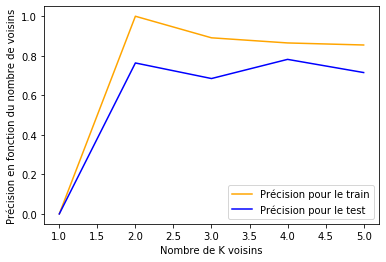

In [155]:
# on crée deux vecteurs composés de 25 zéros; lors de la boucle, les valeurs calculées de l'accuracy pour le train
# (acc_train_vector) et pour le test (acc_test_vector) seront implémentées dans les vecteurs et remplaceront les zéros.
# On représentera ensuite les valeurs de ces vecteurs sur un graphique en fonction du nombre de voisins afin de déterminer 
# pour le train et le test quel nombre de voisins maximise l'accuracy.
# Notre boucle testera le nombre de voisins pour i appartenant  [1,25]  (d'où les vecteurs d'accuracy de taille n=25)

acc_train_vector=np.zeros((5,))
acc_test_vector=np.zeros((5,))


# on crée ensuite la boucle qui permettra de calculer l'accuracy de la partie train et test pour chacune des 25 
#valeurs du nombre de voisins :

for my_nb_neighbours in np.arange(1,5):

    knn_model = KNeighborsClassifier(n_neighbors=my_nb_neighbours)
    knn_model.fit(X_train_norm_np, y_train_np)
    
    y_predict_train=knn_model.predict(X_train_norm_np)
    y_predict_test=knn_model.predict(X_test_norm_np)
    
    accuracy_train=accuracy_score(y_train_np, y_predict_train, normalize=True, sample_weight=None) 
    acc_train_vector[my_nb_neighbours]=accuracy_train
    
    accuracy_test=accuracy_score(y_test_np, y_predict_test, normalize=True, sample_weight=None)
    acc_test_vector[my_nb_neighbours]=accuracy_test
    
# ensuite on réalise le graphique : 

plt.figure()
plt.plot(np.arange(1,6),acc_train_vector,"orange")
plt.plot(np.arange(1,6),acc_test_vector,"b")
plt.legend(["Précision pour le train", "Précision pour le test"])
plt.xlabel("Nombre de K voisins")
plt.ylabel("Précision en fonction du nombre de voisins")

### C. SVM

In [ ]:

my_kernel=['lbfgs', 'liblinear']
my_gamma=np.arange()
c=np.arange(0.001, 10, 0.001)

# on crée une liste vide qui contient n (nombre de modèles testés) vecteurs de p lignes (nombre de résultats, c'est-à-dire
# nombre de C testés)
list_results=[]

for i in range(len(my_penalty)):
    
    parameters={'C':c}

    reg_log=linear_model.LogisticRegression(solver=my_solver[i], penalty=my_penalty[i])
    clf=GridSearchCV(reg_log, parameters)

    clf.fit(X_train_norm, y_train)

    results=clf.cv_results_
    # score: accuracy de validation du modèle testé
    results2=results['mean_test_score']
    
    list_results.append(results2)

## 3. Traitement de texte sur les titres des livres afin de créer de nouvelles catégories

Nous avons remarqué qu'il n'existe que deux genres de livres dans la colonne "Genre" : "fiction" et "non fiction". A COMPL2TER

Pour ce faire, nous définissons tout d'abord des catégories en sélectionnant des mots-clés des 150 premiers titres.

In [130]:
developpement_personnel= ['LIFE', 'CHANGE', 'RULE', 'LOVE', 'RELATIONSHIP', 'ARGUE', 'HOW','BABY', 'BALANCE', 'ME', 'MIND',
                         'MASTER', 'PARENT', 'LEAD', 'TRANSFORM', 'PURPOSE', 'PATH', 'HAPPINESS', 'SOUL', 'HEAL', 
                          'MOTIVATION', 'GOAL', 'SELF-CONFIDENCE', 'EMBRACE', 'MINDFULNESS', 'PLAN', 'MEANT', 'GRATITUDE'
                         'PEACE', 'CALLING', 'MINDSET', 'SUCCESS', 'POWER', 'PERSONALITY', 'MBTI', 'TEACH', 'HABIT', 'HEALTH']

fantastique=['DRAGON', 'THRONES', 'ALLEGIANT', 'DIVERGENT', 'TWILIGHT', 'POTTER', 'OLYMPUS', 'ZELDA', 'OLYMPIAN']

thriller=['MURDER', 'MYSTERY', 'DEAD', 'KILLER', 'FBI', 'HOSTAGE']

politique=['1984','TRUMP', 'OBAMA', 'CLINTON', 'PAILIN', 'POWER', 'WASHINGTON', 'GOVERNMENT', 'LINCOLN', 'REAGAN',
          'NIXON', 'WATERGATE', 'PRESIDENT', 'MANIFESTO', 'RULE', 'REVOLUTION']

enfants=['KID', 'CATERPILLAR', 'BEAR', 'UNDERPANTS', 'GIRAFFE', 'POTTY', 'POKEMON', 'COMICS', 'PUPPY', 'SCHOOL',
        'KINDERGARTEN']

cuisine=['DISH', 'LUNCH', 'SMOOTHIE', 'RECIPE', 'CRAVINGS', 'EAT', 'DIET', 'FOOD', 'CARBS', 'KETO', 'SUGAR', 'PROTEIN',
        'COOKBOOK', 'COOKING', 'FAT']

historique=['HISTORY', 'MEMOIR', 'TIME', 'AUTOBIOGRAPHY', 'GOLIATH']

loisir=['COLORING', 'CREATIVE', 'FUN', 'DIY']

savoirs=['ASTROPHYSICS', 'MEDICINE', 'CAPITAL', 'ECONOMICS', 'DIAGNOSTIC', 'MANUAL', 'KNOWLEDGE', 'SCIENCE' ]

romans=['NOVEL','DIARY', 'STORY']

religion=['JESUS', 'GOD', 'HEAVEN', 'RELIGION', 'FAITH']

In [129]:
df['category']=''

In [131]:
df['Name']=df['Name'].str.upper()

In [134]:
tokenizer= nltk.tokenize.WhitespaceTokenizer()

In [135]:
texte_tok= list()
for i in df['Name']: 
    x= tokenizer.tokenize(i)
    texte_tok.append(x)

In [137]:
df['Name']=texte_tok